In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# figure
%config InlineBackend.figure_format = 'svg'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#read the data
df = pd.read_csv('data/KaggleV2-May-2016.csv')

In [5]:
# check the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# change columns name

new_col_name = ['patient_id', 'appointment_id','gender','schedule_day','appointment_day','age','neighborhood',
               'scholarship','hypertension','diabetes','alcoholism','handicap',
               'sms_received','no_show']
df.columns = new_col_name

In [8]:
df.head(2)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
# check missing value
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
schedule_day       0
appointment_day    0
age                0
neighborhood       0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [10]:
# change data type

df = df.astype({
    'patient_id': 'int64',
    'scholarship':'object',
    'hypertension': 'object',
    'diabetes': 'object',
    'alcoholism':'object',
    'handicap':'object',
    'sms_received': 'object'
})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null object
hypertension       110527 non-null object
diabetes           110527 non-null object
alcoholism         110527 non-null object
handicap           110527 non-null object
sms_received       110527 non-null object
no_show            110527 non-null object
dtypes: int64(3), object(11)
memory usage: 11.8+ MB


In [12]:
# change to datetime type
df['schedule_day']= pd.to_datetime(df['schedule_day'])
df['appointment_day']= pd.to_datetime(df['appointment_day'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null object
hypertension       110527 non-null object
diabetes           110527 non-null object
alcoholism         110527 non-null object
handicap           110527 non-null object
sms_received       110527 non-null object
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 11.8+ MB


In [14]:
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# check summary statistics
df.describe()

,patient_id,appointment_id,age
count,1.105270e+05,1.105270e+05,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874
std,2.560949e+14,7.129575e+04,23.110205
min,3.921700e+04,5.030230e+06,-1.000000
25%,4.172614e+12,5.640286e+06,18.000000
50%,3.173184e+13,5.680573e+06,37.000000
75%,9.439172e+13,5.725524e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


return only numeric value 

In [16]:
# statistics for all columns
df.describe(include= 'all');

minimum age is $-1$ , so lets check less than $0$

In [17]:
df[df['age']< 0]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


So there is one row that contain age less than $0$. So lets drop that row.

In [18]:
# drop row with condition
df.drop(df[df['age'] < 0].index, inplace =True)

In [19]:
df.describe()

,patient_id,appointment_id,age
count,1.105260e+05,1.105260e+05,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219
std,2.560943e+14,7.129544e+04,23.110026
min,3.921700e+04,5.030230e+06,0.000000
25%,4.172536e+12,5.640285e+06,18.000000
50%,3.173184e+13,5.680572e+06,37.000000
75%,9.438963e+13,5.725523e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [20]:
showed_up = df['no_show'] == 'No'
not_showed_up = df['no_show'] == 'Yes'

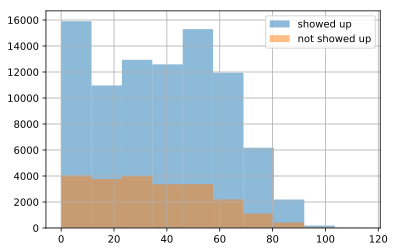

In [21]:
# age versus showed up or not

df.age[showed_up].hist(label = 'showed up', alpha = 0.5)
df.age[not_showed_up].hist(label = 'not showed up', alpha = 0.5)
plt.legend();

In [22]:
df.age.nunique()

103

In [23]:
df.head(3)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [24]:
replacement_gender = { 'F': 'Female', 
              'M': 'Male'}
df['gender'].replace(replacement_gender, inplace = True)

In [25]:
# for one value
# df['no_show'].replace('No', 'showed up', inplace = True);

In [26]:
replacement = { 'No': 'Showed up', 
              'Yes': 'not showed up'}
df['no_show'].replace(replacement, inplace = True)

In [27]:
df.head(2)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up
1,558997776694438,5642503,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up


In [28]:
age_noshow = pd.crosstab(index = df['age'],
                        columns = df['no_show'], normalize = 'index')
age_noshow.head()

no_show,Showed up,not showed up
age,,
0,0.819441,0.180559
1,0.817422,0.182578
2,0.844252,0.155748
3,0.816920,0.183080
4,0.782910,0.217090


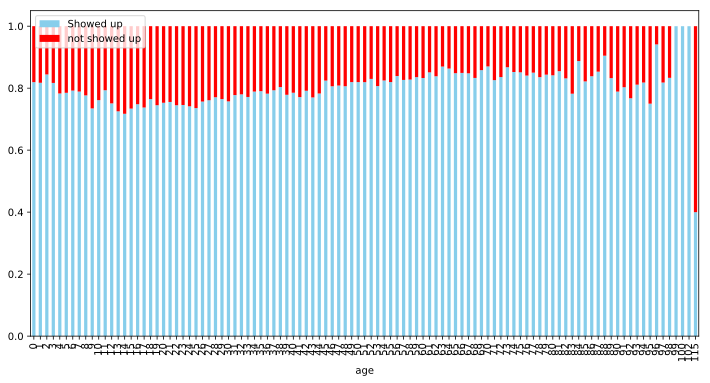

In [29]:
age_noshow.plot(kind = 'bar', stacked = True, figsize=(12,6), color = ['skyblue', 'red'], rot= 90);
plt.legend()

In [30]:
df[['appointment_day', 'no_show']].head()

,appointment_day,no_show
0,2016-04-29,Showed up
1,2016-04-29,Showed up
2,2016-04-29,Showed up
3,2016-04-29,Showed up
4,2016-04-29,Showed up


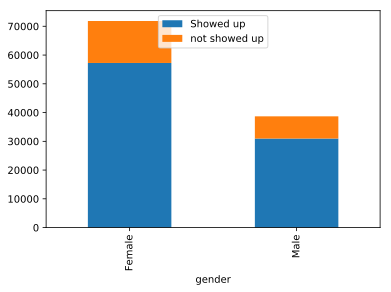

In [31]:
pd.crosstab(index=df["gender"], 
            columns=df["no_show"]).plot(kind='bar', 
                                     stacked = True)
plt.legend(loc = 9);

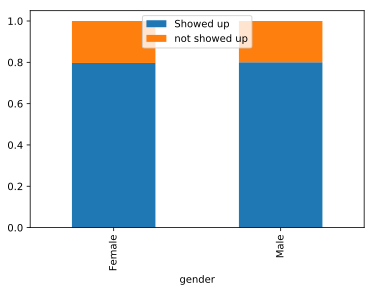

In [32]:
pd.crosstab(index=df["gender"], 
            columns=df["no_show"],
            normalize ='index').plot(kind='bar', 
                                     stacked = True)
plt.legend(loc = 9);

In [33]:
# neighbor
neighbor = pd.crosstab(index=df["neighborhood"], 
            columns=df["no_show"],
            normalize ='index')




In [34]:
neighbor_sort = neighbor.sort_values('Showed up')

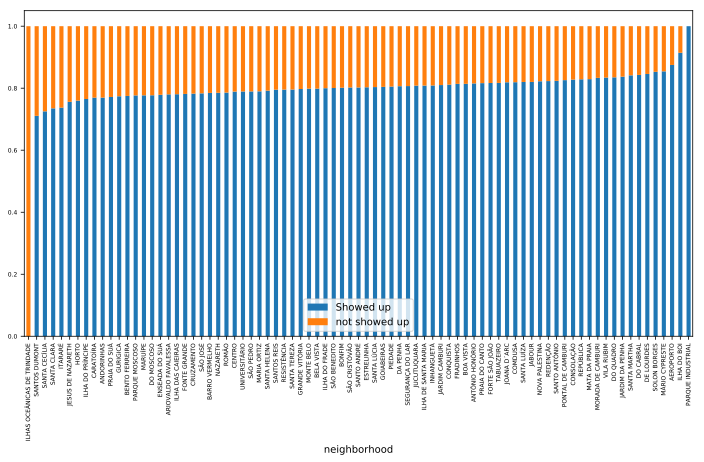

In [35]:
neighbor_sort.plot(kind='bar',figsize = (12,6), fontsize = 6,
                                     stacked = True)

plt.legend();

In [36]:
neighbor = pd.crosstab(index=df["neighborhood"], 
            columns=df["no_show"])
neighbor_sort = neighbor.sort_values('Showed up')


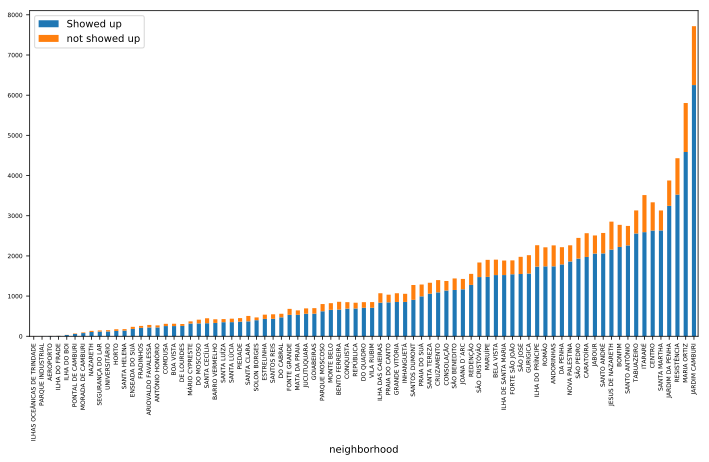

In [37]:
neighbor_sort.plot(kind='bar',figsize = (12,6), fontsize = 6,
                                     stacked = True)

plt.legend();

## chi squared test

In [38]:
# chisquare test
from scipy.stats import chi2_contingency

In [39]:
gender_noshow = pd.crosstab(index=df["gender"], 
            columns=df["no_show"])
gender_noshow

no_show,Showed up,not showed up
gender,,
Female,57245,14594
Male,30962,7725


In [40]:
chi2, p, dof,ex = chi2_contingency(gender_noshow, correction=False)

In [41]:
chi2, p, dof

(1.8779232764439024, 0.17057036874614362, 1)

In [42]:
print('chi-squared value is: {0:6.3f}'.format(chi2))

chi-squared value is:  1.878


In [43]:
print('p value is: {0:6.3f}'.format(p))

p value is:  0.171


In [44]:
print('degree of freedom value is: {0:6.2f}'.format(dof))

degree of freedom value is:   1.00


In [45]:
scholarship_noshow = pd.crosstab(index = df['scholarship'],
                         columns = df['no_show'])
scholarship_noshow

no_show,Showed up,not showed up
scholarship,,
0,79924,19741
1,8283,2578


In [46]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'schedule_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [47]:
chi2, p, dof,ex = chi2_contingency(scholarship_noshow, correction=False)

In [48]:
print('p value is {0:5.22f}'.format(p))

p value is 0.0000000000000000000003


In [49]:
hypertension_noshow = pd.crosstab(index = df['hypertension'],
                         columns = df['no_show'])
hypertension_noshow

no_show,Showed up,not showed up
hypertension,,
0,70178,18547
1,18029,3772


In [50]:
chi2, p, dof,ex = chi2_contingency(hypertension_noshow, correction=False)

In [51]:
p

1.6988514354166416e-32

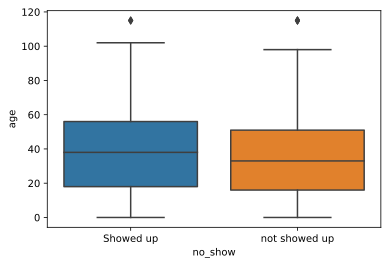

In [52]:
sns.boxplot(x ='no_show', y= 'age', data =df)

In [53]:
df.no_show.value_counts()

Showed up        88207
not showed up    22319
Name: no_show, dtype: int64

In [54]:
df.groupby('no_show')['age'].mean()

no_show
Showed up        37.790504
not showed up    34.317667
Name: age, dtype: float64

In [55]:
not_showed_up = df[df.no_show != 'Showed up'].age

In [56]:
showed_up = df[df.no_show == 'Showed up'].age

In [57]:
showed_up = pd.DataFrame(showed_up)

In [58]:
not_showed_up = pd.DataFrame(not_showed_up)

In [59]:
#showed_up.set_index('age', inplace=True)

In [60]:
#not_showed_up.set_index('age', inplace=True)

In [61]:
#df1.merge(df2,how='left', left_on='Column1', right_on='ColumnA')

## t test

In [62]:
from scipy.stats import ttest_ind

In [63]:
ttest_ind(showed_up, not_showed_up)

Ttest_indResult(statistic=array([20.09233732]), pvalue=array([1.24612644e-89]))

### patient id

In [64]:
df.loc[df.patient_id == 822145925426128 ].head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3006,822145925426128,5638995,Male,2016-04-29 08:38:44,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,Showed up
3060,822145925426128,5642878,Male,2016-04-29 18:02:42,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,Showed up
3093,822145925426128,5640809,Male,2016-04-29 11:27:34,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,Showed up
6984,822145925426128,5705135,Male,2016-05-16 18:38:11,2016-05-16,38,REDENÇÃO,0,0,0,0,0,0,Showed up
6985,822145925426128,5668887,Male,2016-05-06 09:54:32,2016-05-06,38,REDENÇÃO,0,0,0,0,0,0,Showed up


In [65]:
df.loc[df.patient_id == 822145925426128 ][['appointment_day']].agg(['min', 'max'])

,appointment_day
min,2016-04-29
max,2016-06-08


In [66]:
df.patient_id.value_counts().head()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
Name: patient_id, dtype: int64

In [67]:
df.patient_id.nunique()

62298

In [68]:
df.shape

(110526, 14)

In [69]:
df.loc[df.patient_id == 99637671331 ].head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3058,99637671331,5642880,Male,2016-04-29 18:03:27,2016-04-29,46,JABOUR,0,0,0,0,0,0,Showed up
7033,99637671331,5710736,Male,2016-05-17 17:43:45,2016-05-17,46,JABOUR,0,0,0,0,0,0,Showed up
7087,99637671331,5674405,Male,2016-05-09 11:01:47,2016-05-09,46,JABOUR,0,0,0,0,0,0,Showed up
7131,99637671331,5736744,Male,2016-05-25 08:45:41,2016-05-25,46,JABOUR,0,0,0,0,0,0,Showed up
7316,99637671331,5719269,Male,2016-05-19 10:52:35,2016-05-19,46,JABOUR,0,0,0,0,0,0,Showed up


In [70]:
df.loc[df.patient_id == 99637671331 ]['appointment_day'].agg(['min', 'max'])

min   2016-04-29
max   2016-06-08
Name: appointment_day, dtype: datetime64[ns]

In [71]:
column_plot = ['gender',  
               'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received', 
               'no_show']

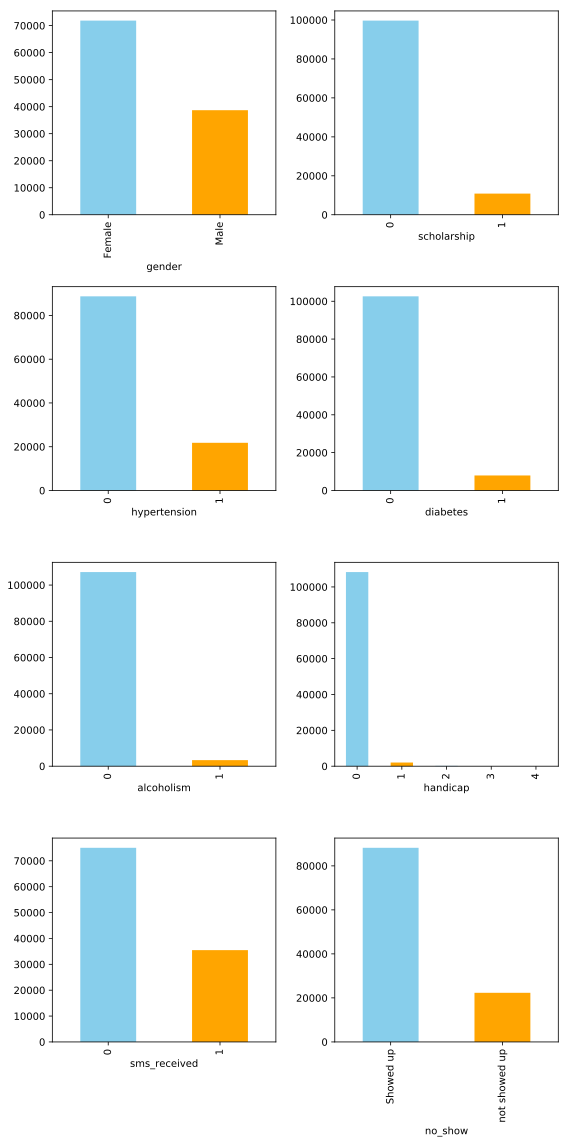

In [72]:
fig = plt.figure(figsize= (8,16))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(4,2, number+1)
    axes.set_xlabel(column)
    df[column].value_counts().plot(kind = 'bar', ax = axes, color = ['skyblue', 'orange'])
plt.tight_layout()

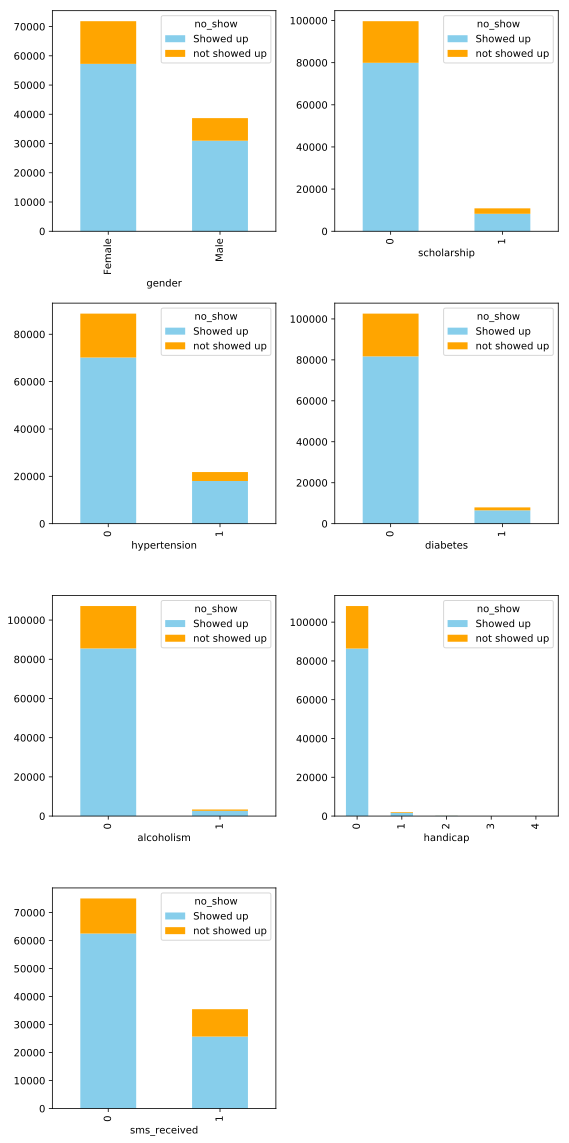

In [74]:
column_plot = ['gender',  
               'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (8,16))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(4,2, number+1)
    df.groupby([column,'no_show'])[column].count().unstack('no_show').plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
plt.tight_layout()   
    

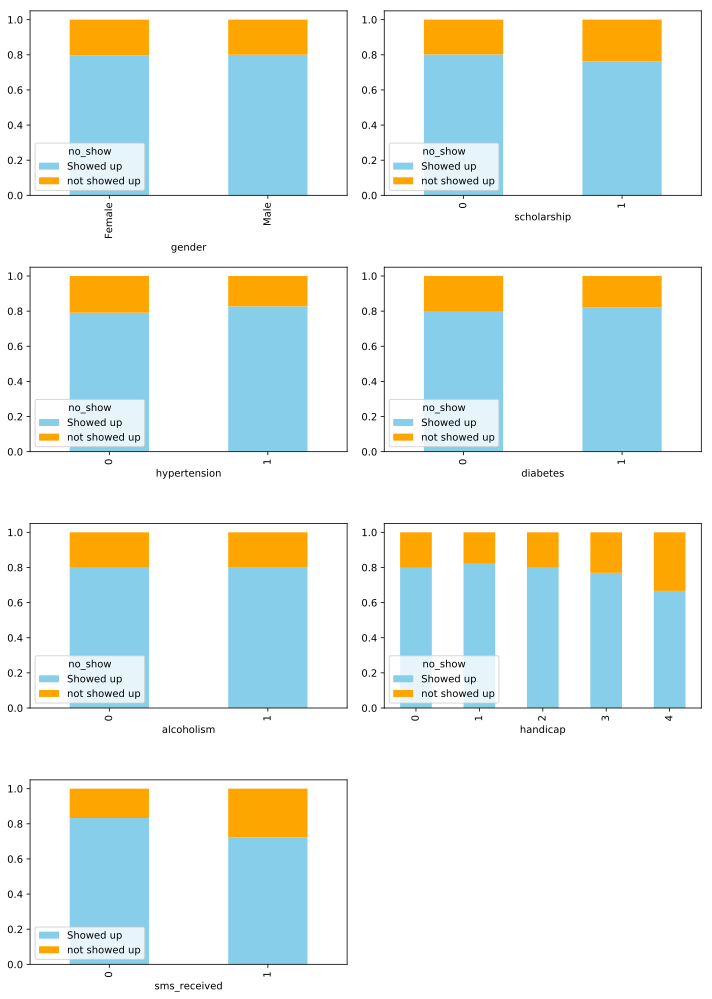

In [75]:
column_plot = ['gender',  
               'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (10,14))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(4,2, number+1)
    pd.crosstab(index = df[column], columns = df['no_show'], normalize = 'index').plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
plt.tight_layout() 
plt.legend(loc = 3);

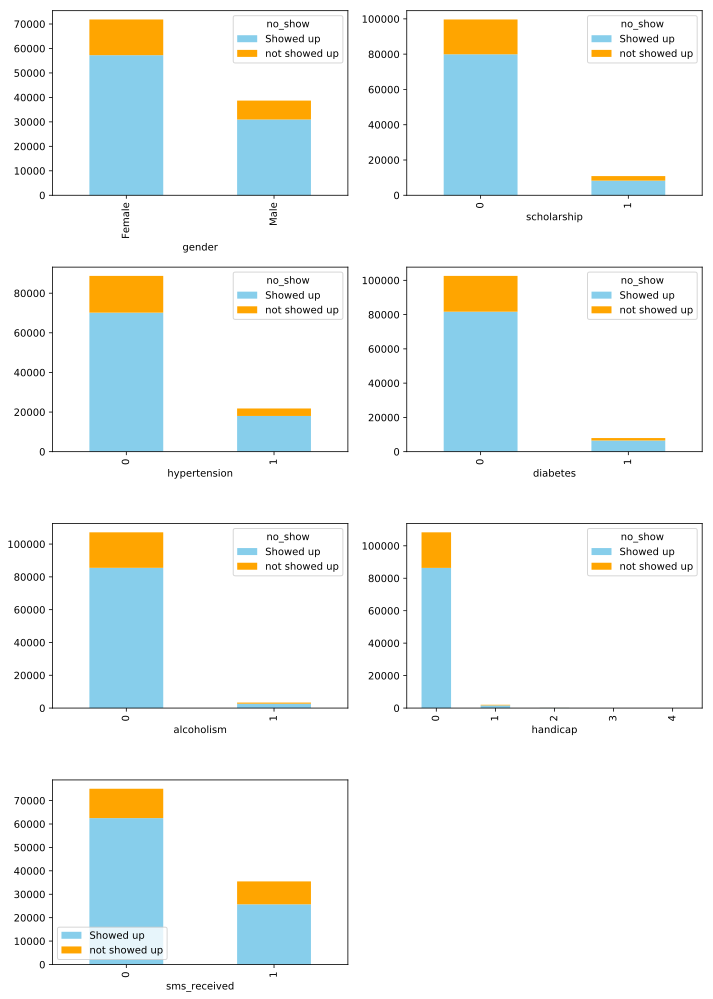

In [76]:
column_plot = ['gender',  
               'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (10,14))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(4,2, number+1)
    pd.crosstab(index = df[column], columns = df['no_show']).plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
plt.tight_layout() 
plt.legend(loc = 3);

### chi square test looping

In [77]:
column_plot = ['gender',
               'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']


for column in (column_plot):
    chi2, p, dof,ex = chi2_contingency(pd.crosstab(index=df[column], columns=df["no_show"]), correction=False)
    print ('chi-squared test- p value for {} is: {r:6.5f}'. format(column,r = p))

    
    
    

chi-squared test- p value for gender is: 0.17057
chi-squared test- p value for scholarship is: 0.00000
chi-squared test- p value for hypertension is: 0.00000
chi-squared test- p value for diabetes is: 0.00000
chi-squared test- p value for alcoholism is: 0.94782
chi-squared test- p value for handicap is: 0.13402
chi-squared test- p value for sms_received is: 0.00000


In [78]:
showed_up = df['no_show'] == 'Showed up'
not_showed_up = df['no_show'] == 'not showed up'

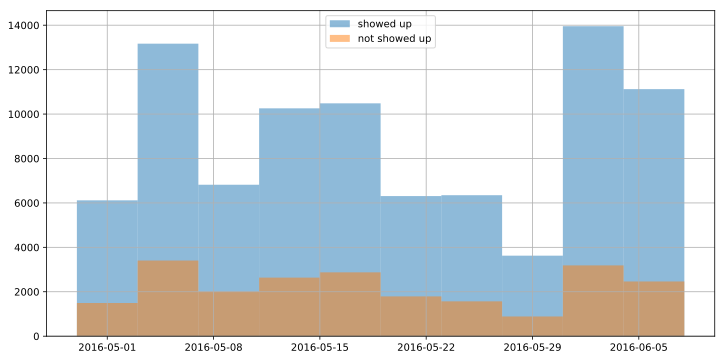

In [79]:
df.appointment_day[showed_up].hist(label = 'showed up', alpha = 0.5, figsize = (12,6))
df.appointment_day[not_showed_up].hist(label = 'not showed up', alpha = 0.5)
plt.legend();


In [82]:
df['day'] = df.appointment_day.dt.weekday_name

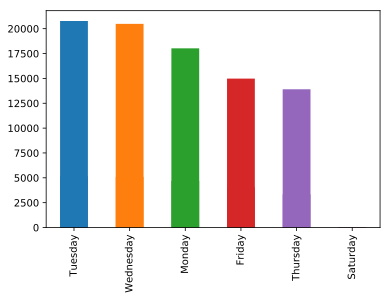

In [91]:
df.day[showed_up].value_counts().plot(kind = 'bar')
df.day[not_showed_up].value_counts().plot(kind = 'bar', stacked = True)

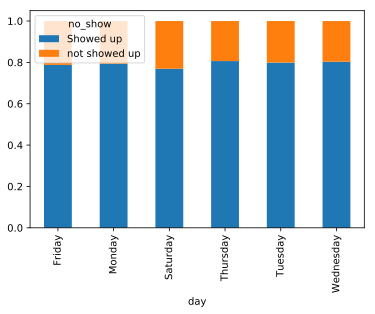

In [97]:
pd.crosstab(index = df['day'],
           columns = df['no_show'], normalize = 'index').plot(kind = 'bar', stacked = True)

In [104]:
days = pd.crosstab(index = df['day'],
           columns = df['no_show'])
days

no_show,Showed up,not showed up
day,,
Friday,14982,4037
Monday,18024,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


In [102]:
chi2, p, dof,ex = chi2_contingency(days, correction=False)

In [105]:
print ('p value is : {r:5.5f}'.format(r = p))

p value is : 0.00005
